/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[-10.33430429 -10.28965015 -10.03964579  -7.99432164  -7.94465148
  -5.64967168  -5.56632697  -5.43027238  -5.12321621  -5.09146391
  -4.87948728  -4.46699867  -4.44615532  -3.90659375  -3.85195257
  -3.83278082  -3.75565408  -3.0281607   -2.95193788  -2.39203063
  -2.38904978  -2.37859368  -2.36178809  -1.98384689  -1.79576251
  -1.78117961  -1.78097181  -1.76282957  -1.61722975  -0.99703513
  -0.9534393   -0.95266555  -0.94939359  -0.94827486  -0.94139467
  -0.29015736  -0.28277022  -0.26055295  -0.19450356  -0.18856324
  -0.13041563  -0.11221367  -0.11180489  -0.1086219   -0.1060334
  -0.02834116  -0.01560427   0.        ]
[-13.62295225 -10.84413136  -9.83589637  -9.44640582  -6.71375176
  -6.14331811  -6.13550037  -5.94421422  -5.40249098  -5.22445255
  -5.17618729  -5.09861719  -5.04773874  -4.74742083  -4.20869878
  -3.78380648  -3.71069693  -3.5769293   -3.31572934  -3.1272407
  -3.08934228  -2.53182459  -2.36689369  -1.87738067  -1.81377121
  -1.80722242  -1.7234855   -1.660301

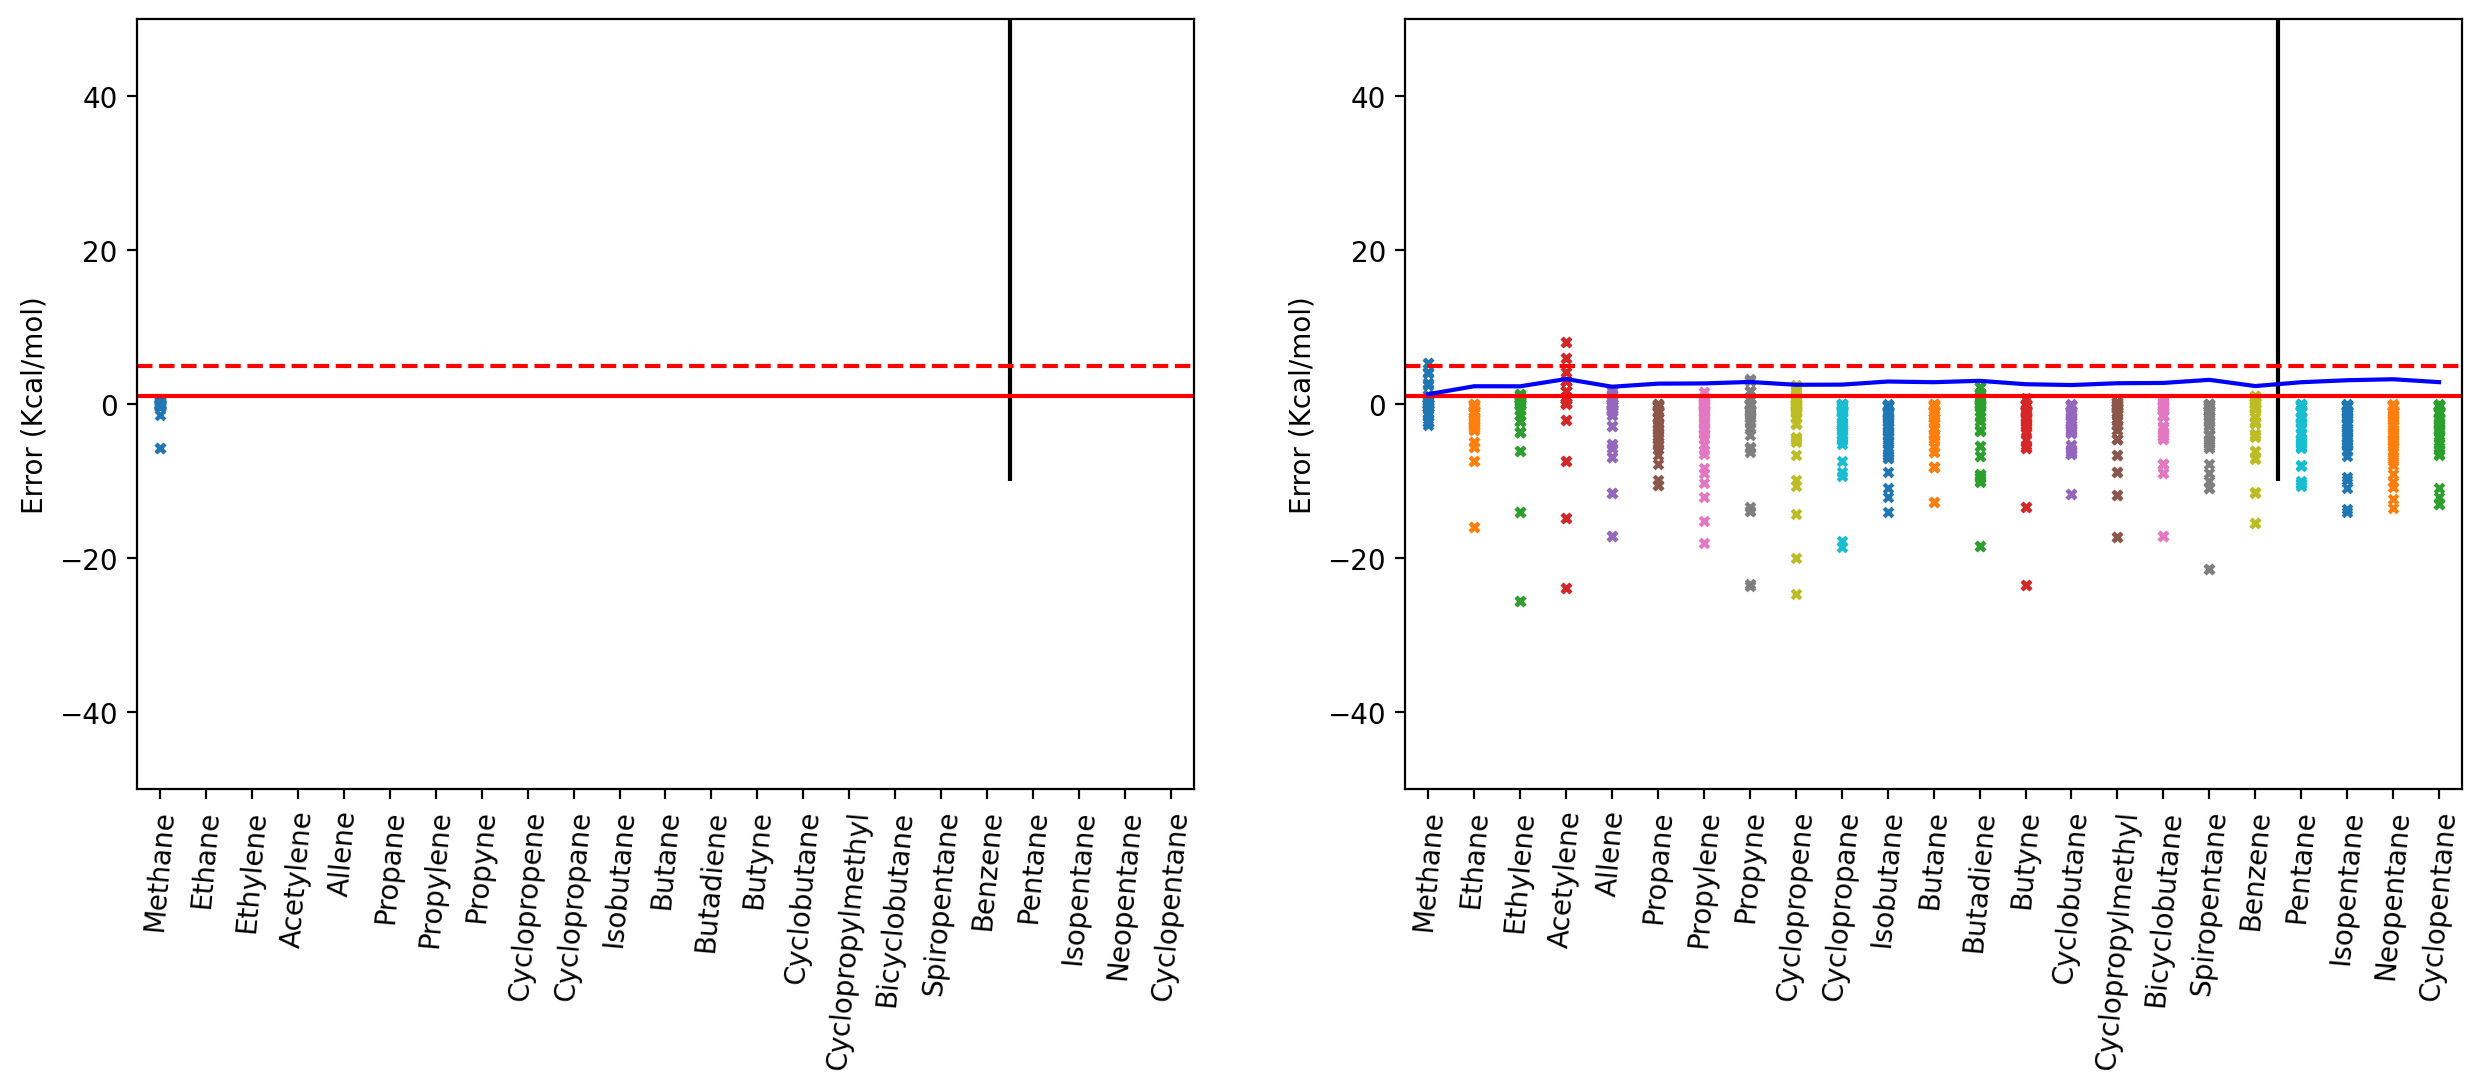

In [11]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TRAIN_STR_DICT = [
    "Methane",
    "Ethane",
    "Ethylene",
    "Acetylene",
    "Allene",
    "Propane",
    "Propylene",
    "Propyne",
    "Cyclopropene",
    "Cyclopropane",
    "Isobutane",
    "Butane",
    "Butadiene",
    "Butyne",
    "Cyclobutane",
    "Cyclopropylmethyl",
    "Bicyclobutane",
    "Spiropentane",
    "Benzene",
]
EVAL_STR_DICT = [
    "Pentane",
    "Isopentane",
    "Neopentane",
    "Cyclopentane",
    # "Hexane",
]

f, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.reshape(1, 2)

# name_dir = "cc-5-800"
# load_path = Path("validate") / name_dir
list_of_path = list(Path("validate/").glob("validate-*"))
load_path = max(list_of_path, key=lambda p: p.stat().st_ctime)

for _ in range(1):
    error_l = []
    data = pd.read_csv(load_path / "train.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_np = data.filter(regex=(f"{i_name}.*")).to_numpy()[0, :] * 0.627509
        data_np_sort = np.sort(data_np)
        error_l.append(np.mean(np.abs(data_np_sort)))
        axes[0,0].scatter(i + np.zeros_like(data_np), data_np, s=10, marker="x")

    i += 1
    axes[0, 0].vlines(i - 0.5, -10, 100, "k")
    axes[0, 0].hlines(1, -0.5, 100 - 0.5, "r")
    axes[0, 0].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path / "eval.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        data_np = data.filter(regex=(f"{j_name}.*")).to_numpy()[0, :] * 0.627509
        data_np_sort = np.sort(data_np)
        error_l.append(np.mean(np.abs(data_np_sort)))
        axes[0, 0].scatter(i + j + np.zeros_like(data_np), data_np, s=10, marker="x")

    axes[0, 0].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )

    axes[0, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")


    ## DFT
    list_of_path = list(Path("validate/").glob("dft"))
    load_path = max(list_of_path, key=lambda p: p.stat().st_ctime)

    error_l = []
    data = pd.read_csv(load_path / "train_dft.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_eq = data.filter(regex=(f"{i_name}_0_1_0.0000")).to_numpy()[0]
        data_np = (data.filter(regex=(f"{i_name}.*")).to_numpy()[0, :] - data_eq) * 0.627509
        data_np_sort = np.sort(data_np)[1:]
        error_l.append(np.mean(np.abs(data_np_sort)))
        axes[0, 1].scatter(i + np.zeros_like(data_np), data_np, s=10, marker="x")

    i += 1
    axes[0, 1].vlines(i - 0.5, -10, 100, "k")
    axes[0, 1].hlines(1, -0.5, 100 - 0.5, "r")
    axes[0, 1].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path / "eval_dft.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        data_eq = data.filter(regex=(f"{j_name}_0_1_0.0000")).to_numpy()[0]
        data_np = (data.filter(regex=(f"{j_name}.*")).to_numpy()[0, :] - data_eq) * 0.627509
        data_np_sort = np.sort(data_np)[1:]
        print(data_np_sort)
        error_l.append(np.mean(np.abs(data_np_sort)))
        axes[0, 1].scatter(i + j + np.zeros_like(data_np), data_np, s=10, marker="x")

    axes[0, 1].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )
    print(error_l)
    axes[0, 1].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")
    
    axes[0, 0].set_ylim(-50, 50)
    axes[0, 0].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
    axes[0, 0].set_ylabel("Error (Kcal/mol)")
    axes[0, 1].set_ylim(-50, 50)
    axes[0, 1].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
    axes[0, 1].set_ylabel("Error (Kcal/mol)")
# plt.savefig(
#     f"./manu/figures/energy-{name_dir}-{datetime.datetime.today():%Y-%m-%d-%H-%M-%S}.pdf",
#     bbox_inches="tight",
# )

In [3]:
import numpy as np
# print(np.linspace(-0.49, 0.49, 8))
print(np.linspace(-0.5, 0.5, 51))
print(np.linspace(-0.5, 0.0, 26))
print(np.linspace(0.02, 0.5, 25))

# -0.25*2 +0.08333333

[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04
 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2
  0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44
  0.46  0.48  0.5 ]
[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04
 -0.02  0.  ]
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5 ]


In [11]:
(np.abs(np.linspace(-0.25, 0.25, 4) - 0) < 1e-4).any()

False